In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

sns.set(context="paper", style="whitegrid", 
       rc={
           "figure.figsize": (21, 9),
           "figure.dpi": 100
       })
google = ["#4285F4", "#DB4437", "#F4B400", "#0F9D58"]

sns.set_palette(google)

## Load Data

In [2]:
df = pd.read_csv("./data/AMPDs2.csv")
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22075200 entries, 0 to 22075199
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   TIMESTAMP              datetime64[ns]
 1   power factor_apparent  float64       
 2   power_reactive         float64       
 3   power_active           float64       
 4   power_apparent         float64       
 5   appliances_type        object        
 6   appliances_id          int64         
 7   appliances_name        object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 1.3+ GB


In [4]:
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name
0,2012-04-01 00:00:00,0.93,141.0,918.0,1066.0,main,1,main 1
1,2012-04-01 00:01:00,0.93,141.0,913.0,1056.0,main,1,main 1
2,2012-04-01 00:02:00,0.93,139.0,872.0,1021.0,main,1,main 1
3,2012-04-01 00:03:00,0.93,141.0,872.0,1018.0,main,1,main 1
4,2012-04-01 00:04:00,0.89,140.0,772.0,1018.0,main,1,main 1


In [5]:
main_df = df[df['appliances_type'] == 'main']

In [6]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1051200 entries, 0 to 1051199
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   TIMESTAMP              1051200 non-null  datetime64[ns]
 1   power factor_apparent  1051200 non-null  float64       
 2   power_reactive         1051200 non-null  float64       
 3   power_active           1051200 non-null  float64       
 4   power_apparent         1051200 non-null  float64       
 5   appliances_type        1051200 non-null  object        
 6   appliances_id          1051200 non-null  int64         
 7   appliances_name        1051200 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 72.2+ MB


In [7]:
df = df.drop(index=main_df.index)

In [8]:
df = df.reset_index().drop(columns=['index'], axis=1)
df.head()

,TIMESTAMP,power factor_apparent,power_reactive,power_active,power_apparent,appliances_type,appliances_id,appliances_name
0,2012-04-01 00:00:00,0.0,0.0,0.0,9.0,light,1,light 1
1,2012-04-01 00:01:00,0.0,0.0,0.0,9.0,light,1,light 1
2,2012-04-01 00:02:00,0.0,0.0,0.0,9.0,light,1,light 1
3,2012-04-01 00:03:00,0.0,0.0,0.0,9.0,light,1,light 1
4,2012-04-01 00:04:00,0.0,0.0,0.0,9.0,light,1,light 1


### get top appliances by power consumption

In [9]:
top_power_consump = df[df["power_active"] >= 40]\
    .groupby(["appliances_name"])\
    .mean()\
    .sort_values("power_active", ascending=False)\
    .reset_index()['appliances_name'].tolist()

In [10]:
top_power_consump

['unknown 1',
 'heat pump 1',
 'electric oven 1',
 'unknown 3',
 'light 1',
 'light 3',
 'unknown 7',
 'sockets 2',
 'unknown 9',
 'unknown 2',
 'unknown 4',
 'television 1',
 'fridge 1',
 'unknown 6',
 'light 2',
 'light 4',
 'sockets 3',
 'unknown 8',
 'sockets 1',
 'unknown 5']

### Data sampling period

In [11]:
sampling_period = int((df['TIMESTAMP'][1] - df['TIMESTAMP'][0]).total_seconds()/60)
sampling_period

1

In [12]:
oneday_n = 24*60//sampling_period
oneday_n

1440

In [13]:
oneweek_n = oneday_n*7

## EDA

In [14]:
# select top appliance
top_k = 10
num_appliance = len(top_power_consump)

### daily

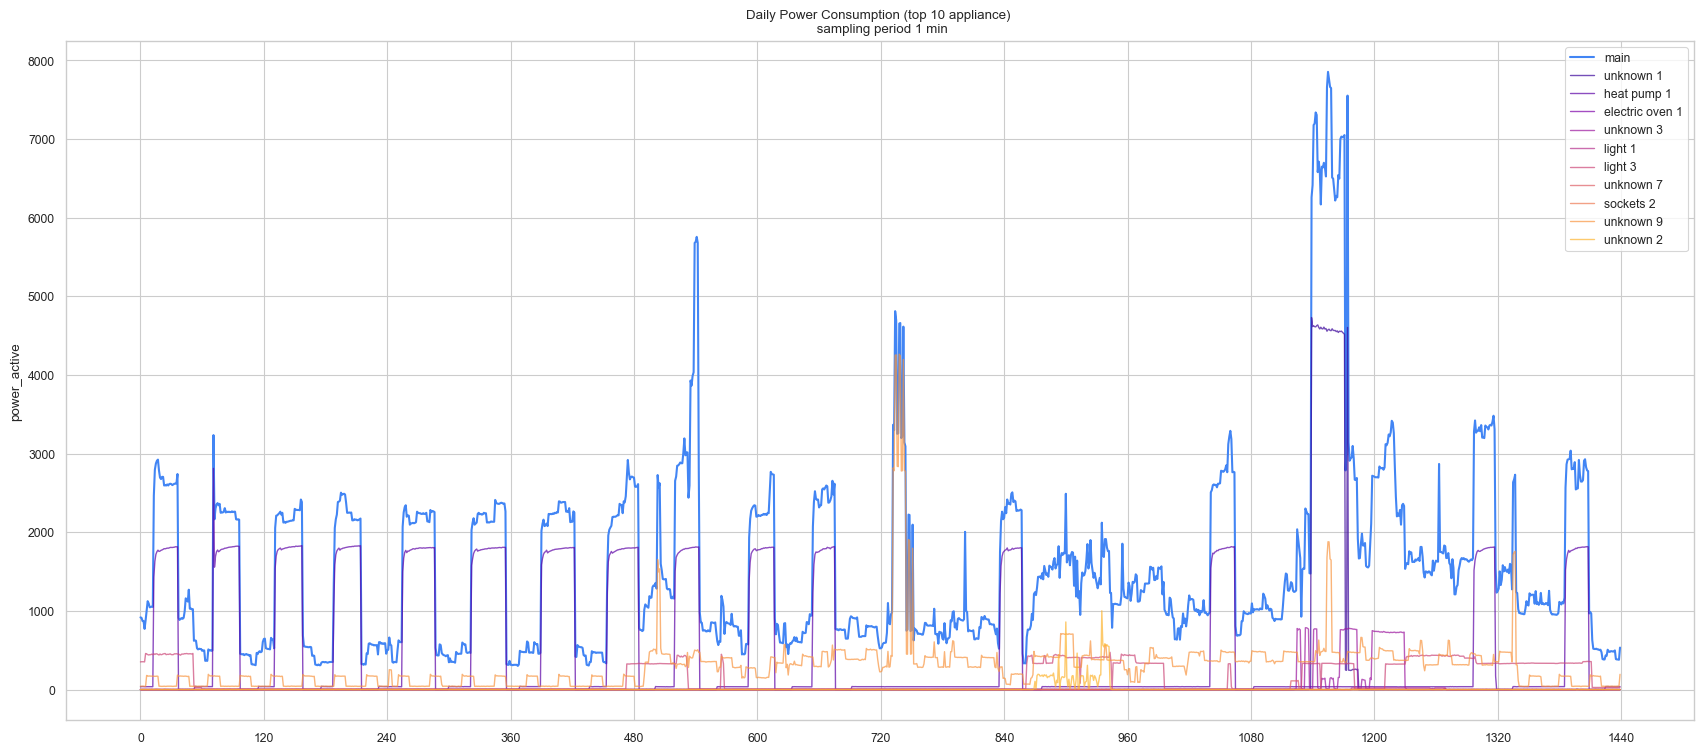

In [15]:
# plot main
sns.set_palette("plasma", top_k+1)
power_col = 'power_active'

x = np.arange(0, oneday_n)
sns.lineplot(x, main_df[power_col][:oneday_n], label='main', lw=1.5, color=google[0])

# plot appliances
sns.set_palette("plasma", top_k+1)
for i in range(top_k):
    appliance_name = top_power_consump[i]
    app_df = df[df['appliances_name'] == appliance_name]
    sns.lineplot(x, app_df[power_col][:oneday_n], label=appliance_name, lw=1, alpha=0.7)
    
plt.xticks(np.arange(0, oneday_n+120, 120))
plt.title(f"Daily Power Consumption (top {top_k} appliance) \n sampling period {sampling_period} min")

plt.savefig(f"./visualization_output/03_daily_{top_k}_appliance_power.png", dpi=150)
plt.show()

### 1 week

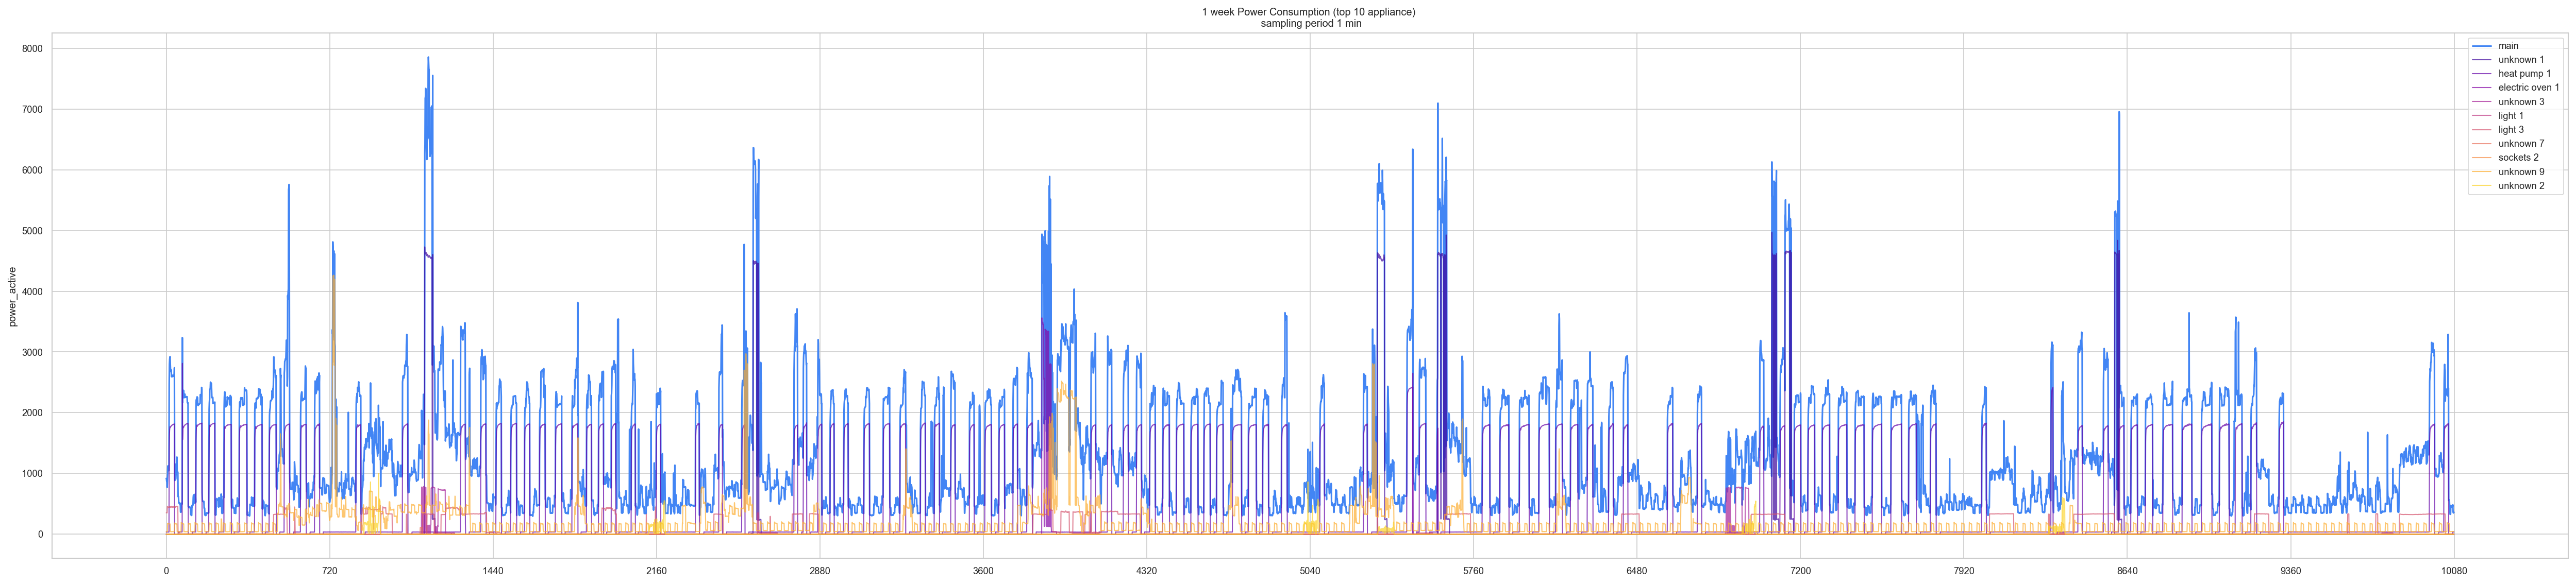

In [16]:
# plot main
sns.set_palette("plasma", top_k)
power_col = 'power_active'

n_week = 1

plt.figure(figsize=(42*n_week, 9), dpi=150)

x = np.arange(0, oneweek_n*n_week)
sns.lineplot(x, main_df[power_col][:oneweek_n*n_week], label='main', lw=1.5, color=google[0])

# plot appliances
for i in range(top_k):
    appliance_name = top_power_consump[i]
    app_df = df[df['appliances_name'] == appliance_name]
    sns.lineplot(x, app_df[power_col][:oneweek_n*n_week], label=appliance_name, lw=1, alpha=0.7)

plt.xticks(np.arange(0, oneweek_n+oneday_n/2, oneday_n/2))
plt.title(f"{n_week} week Power Consumption (top {top_k} appliance) \n sampling period {sampling_period} min")

plt.savefig(f"./visualization_output/03_{n_week}week_appliance_power.png", dpi=150)
plt.show()

### n week appliances only

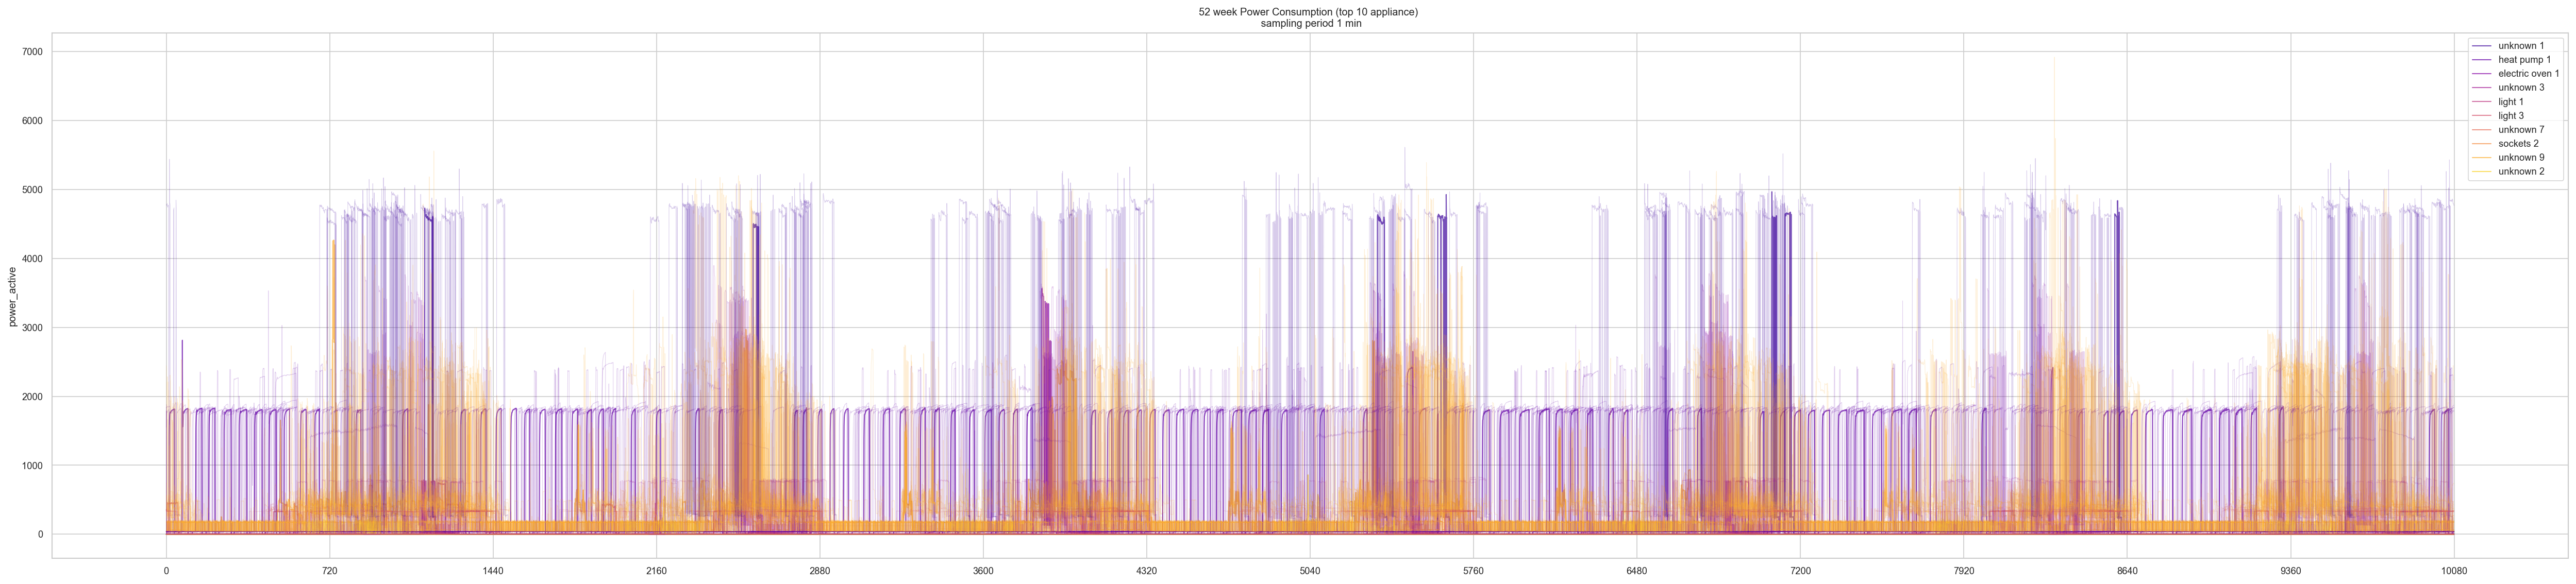

In [17]:
# plot main
sns.set_palette("plasma", top_k)
power_col = 'power_active'

n_week = 52

plt.figure(figsize=(42, 9), dpi=150)

x = np.arange(0, oneweek_n)

# plot appliances
plot_label = True
for w in range(n_week):
    for i in range(top_k):
        if plot_label:
            appliance_name = top_power_consump[i]
            app_df = df[df['appliances_name'] == appliance_name]
            sns.lineplot(x, app_df[power_col][oneweek_n*w:oneweek_n*(w+1)], lw=1, alpha=0.7, label=appliance_name)
        else:
            appliance_name = top_power_consump[i]
            app_df = df[df['appliances_name'] == appliance_name]
            sns.lineplot(x, app_df[power_col][oneweek_n*w:oneweek_n*(w+1)], lw=0.5, alpha=0.2)
    plot_label = False
plt.xticks(np.arange(0, oneweek_n+oneday_n/2, oneday_n/2))
plt.title(f"{n_week} week Power Consumption (top {top_k} appliance) \n sampling period {sampling_period} min")

plt.savefig(f"./visualization_output/03_{n_week}week_appliance_power.png", dpi=150)
plt.show()

> color map ใช้สีอะไรดี?